In [1]:
%matplotlib inline
import random
import itertools
import matplotlib.pyplot as plt
import networkx as nx

## List of Strategies Used:
1. Greedy Graph Coloring Algorithm (Vanilla)
2. Greedy Graph Coloring By Ordering Nodes By Largest Degree First
3. Greedy Graph Coloring By Random Ordering of Nodes
4. Welsh Powell
5. Greedy Graph Colouring Using BFS
6. Greedy Graph Colouring Using DFS

### Helper Functions

In [2]:
def colour(n):
    ret = {}
    for i in range(n):
        r = int(random.random() * 256)
        g = int(random.random() * 256)
        b = int(random.random() * 256)
        ret[i] = "#{:02x}{:02x}{:02x}".format(r,g,b) 
    return ret
colorList = colour(5000)
minDegNode = lambda G: min(G, key=G.degree)
maxDegNode = lambda G: max(G, key=G.degree)

def transformDict(myDict):
    for key,value in myDict.items():
        myDict[key] = colorList[value]
    return myDict

# Greedy Graph Coloring (Vanilla)

In [3]:
def greedyGraphColoring(G):
    colors = {}
    graphNodes = G.nodes()
    
    for node in graphNodes:
        adjColors = set()
        for adjNode in G.neighbors(node):
            if adjNode in colors:
                adjColors.add(colors[adjNode])
                
        for color in itertools.count():
            if color not in adjColors:
                break
                
        colors[node] = color
    return colors

# Greedy Graph Coloring By Ordering Nodes (Largest Degree First)

In [4]:
def greedyDegreeSort(G):
    colors = {}
    graphNodes = list(G.nodes())
    graphNodes.sort(key=lambda node: -G.degree(node))
    
    for node in graphNodes:
        adjColors = set()
        for adjNode in G.neighbors(node):
            if adjNode in colors:
                adjColors.add(colors[adjNode])
                
        for color in itertools.count():
            if color not in adjColors:
                break
                
        colors[node] = color
    return colors

# Greedy Graph Coloring By Random Shuffling

In [5]:
def greedyRandomShuffling(G):
    colors = {}
    graphNodes = G.nodes()
    random.shuffle(list(graphNodes))
    
    for node in graphNodes:
        adjColors = set()
        for adjNode in G.neighbors(node):
            if adjNode in colors:
                adjColors.add(colors[adjNode])
                
        for color in itertools.count():
            if color not in adjColors:
                break
                
        colors[node] = color
    return colors

# Welsh Powell Algorithm

In [6]:
def welsh_powell2(G):  
    x = sorted(G.degree, key=lambda x: x[1], reverse=True)
    len_g = len(G)
    no_colored = 0
    k = 1
    colors = dict()
    while no_colored <  len_g:
        colored = set()
        colorednodes = set()
        for node in x:
            y = set(G.neighbors(node[0]))
            if y.intersection(colorednodes) == set():
                colors[node[0]] = k
                no_colored +=1
                colored.add(node)
                colorednodes.add(node[0])
        x = list(set(x) - colored)
        k+=1
    return colors

In [7]:
def welsh_powell(G):
    colors = {}  
    x = sorted(G.degree, key=lambda x: x[1], reverse=True)
    len_g = len(G)
    no_colored = 0
    k = 1
    while no_colored <  len_g:
        colored = set()
        for new_node in x:
            if colored not in G.neighbors(new_node[0]):
                colors[new_node[0]] = k
                no_colored +=1
                colored.add(new_node)
        x = list(set(x) - colored)
        k+=1
    return colors

In [8]:
def strategy_connected_sequential_bfs(G, colors):
    return strategy_connected_sequential(G, colors, 'bfs')
def strategy_connected_sequential_dfs(G, colors):
    return strategy_connected_sequential(G, colors, 'dfs')
def strategy_connected_sequential(G, colors, traversal='bfs'):
    for component_graph in nx.connected_component_subgraphs(G):
        source = component_graph.nodes()[0]
        yield source
        if traversal == 'bfs':
            tree = nx.bfs_edges(component_graph, source)
        elif traversal == 'dfs':
            tree = nx.dfs_edges(component_graph, source)
        else:
            raise nx.NetworkXError('Please specify bfs or dfs for connected sequential ordering')
        for (_, end) in tree:
            yield end
def greedy_color(G, strategy, interchange=False):
    colors = {}
    for node in nodes:
        neighbour_colors = set()
        for neighbour in G.neighbors_iter(node):
            if neighbour in colors:
                neighbour_colors.add(colors[neighbour])
        for color in itertools.count():
            if color not in neighbour_colors:
                break
        colors[node] = color
    return colors

## Test Cases

In [9]:
def printGraphAndAnalyse(G, sizeoffigure):
    fig = plt.figure(figsize=(2*sizeoffigure,sizeoffigure))
    plt.subplot(1, 2, 1)
    nx.draw(G, with_labels=True)
    plt.subplot(1, 2, 2)
    nodeColors = transformDict(greedyGraphColoring(G))
    nx.draw(G, with_labels=True, node_color=list(nodeColors.values()))
    plt.show()
    print("Time taken by different Algorithms:\n")
    print("Basic Greedy Algorithm:")
    %timeit -n 10 -r 2 greedyGraphColoring(G)
    print("\nGreedy Graph Coloring By Ordering Nodes (By Largest Degree First):")
    %timeit -n 10 -r 2 greedyDegreeSort(G)
    print("\nGreedy Algorithm With Random Shuffling:")
    %timeit -n 10 -r 2 greedyRandomShuffling(G)
    print("\nWelsh Powell:")
    %timeit -n 10 -r 2 welsh_powell(G)
    print("\nGreedy Algorithm using DFS ")
    %timeit -n 10 -r 2 nx.coloring.greedy_color(G, strategy=nx.coloring.strategy_connected_sequential_dfs)    
    print("\nGreedy Algorithm using BFS ")
    %timeit -n 10 -r 2 nx.coloring.greedy_color(G, strategy=nx.coloring.strategy_connected_sequential_bfs)
def analyse(G):
    print("Basic Greedy Algorithm")
    %timeit -n 10 -r 2 greedyGraphColoring(G)
    print("\nGreedy Graph Coloring By Ordering Nodes (By Largest Degree First)")
    %timeit -n 10 -r 2 greedyDegreeSort(G)
    print("\nGreedy Algorithm With Random Shuffling")
    %timeit -n 10 -r 2 greedyRandomShuffling(G)
    print("\nWelsh Powell")
    %timeit -n 10 -r 2 welsh_powell(G)
    print("\nGreedy Algorithm using DFS ")
    %timeit -n 10 -r 2 nx.coloring.greedy_color(G, strategy=nx.coloring.strategy_connected_sequential_dfs)    
    print("\nGreedy Algorithm using BFS ")
    %timeit -n 10 -r 2 nx.coloring.greedy_color(G, strategy=nx.coloring.strategy_connected_sequential_bfs)

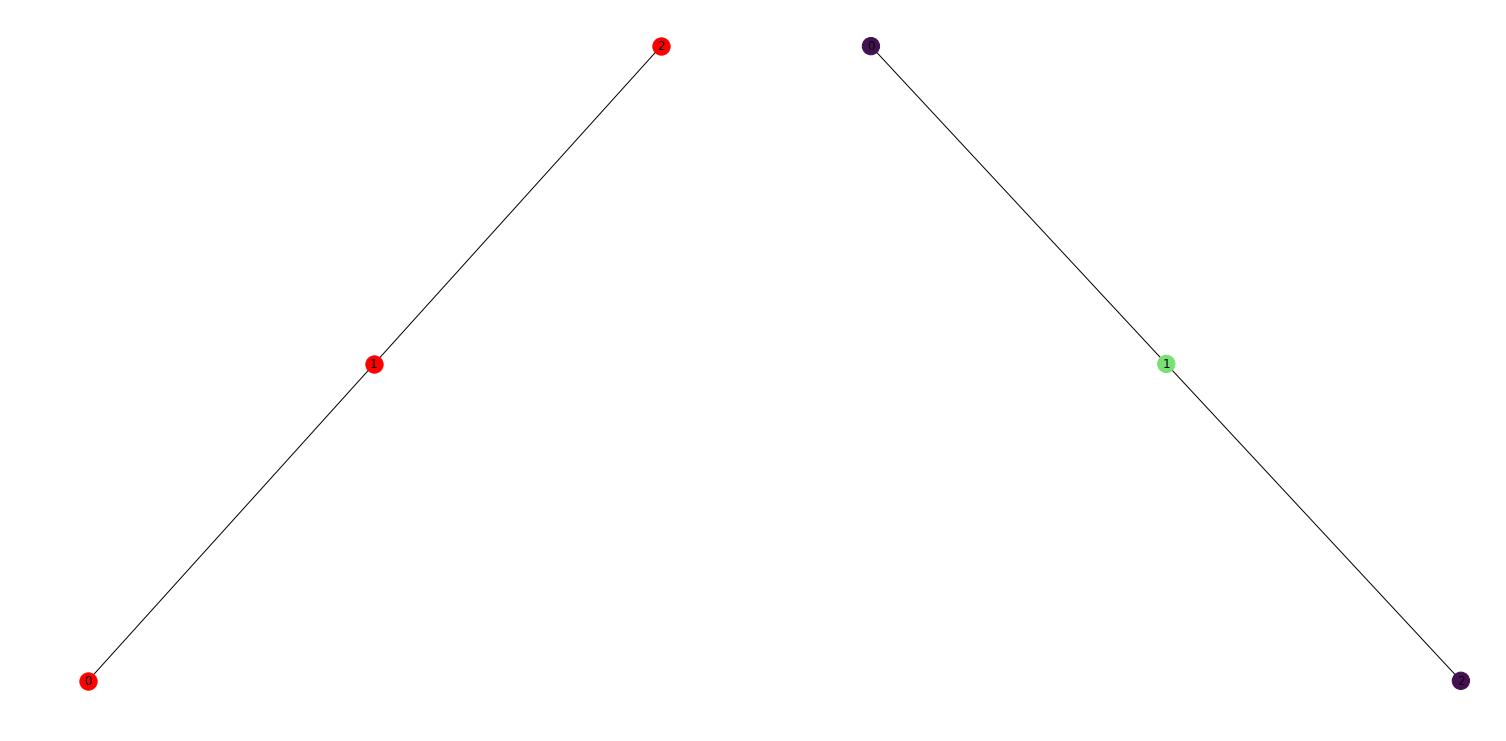

Time taken by different Algorithms:

Basic Greedy Algorithm:
3.96 µs ± 630 ns per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Graph Coloring By Ordering Nodes (By Largest Degree First):
13.8 µs ± 2.41 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Algorithm With Random Shuffling:
7.61 µs ± 1.66 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)

Welsh Powell:
8.15 µs ± 964 ns per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Algorithm using DFS 
86.3 µs ± 5 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Algorithm using BFS 
77.3 µs ± 2.02 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [10]:
G = nx.Graph()
G.add_nodes_from([0,1,2])
G.add_edges_from([(0,1),(1,2)])

printGraphAndAnalyse(G, 13)

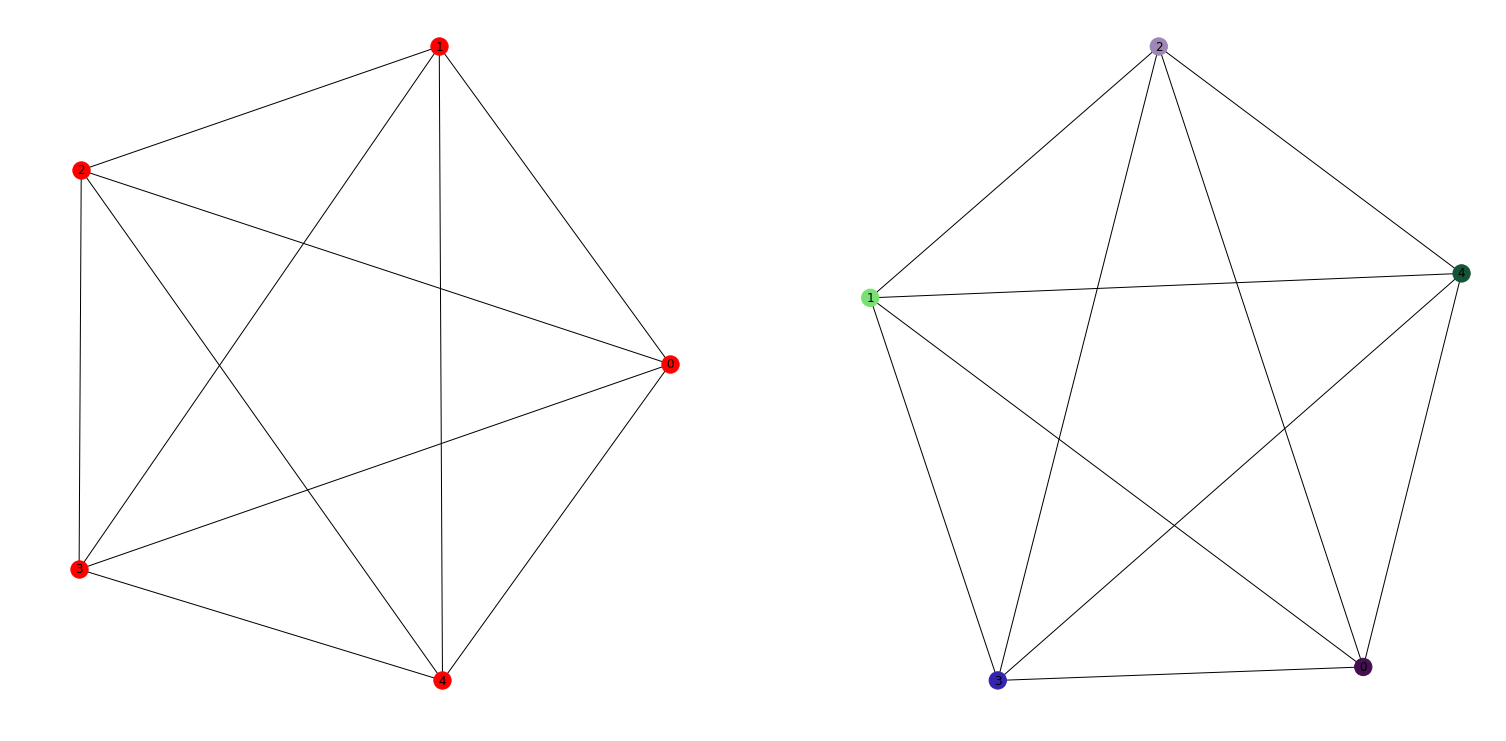

Time taken by different Algorithms:

Basic Greedy Algorithm:
6.63 µs ± 690 ns per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Graph Coloring By Ordering Nodes (By Largest Degree First):
19.4 µs ± 1.22 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Algorithm With Random Shuffling:
10.8 µs ± 963 ns per loop (mean ± std. dev. of 2 runs, 10 loops each)

Welsh Powell:
9.63 µs ± 983 ns per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Algorithm using DFS 
153 µs ± 954 ns per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Algorithm using BFS 
142 µs ± 5.53 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [11]:
G = nx.complete_graph(5)
printGraphAndAnalyse(G, 13)

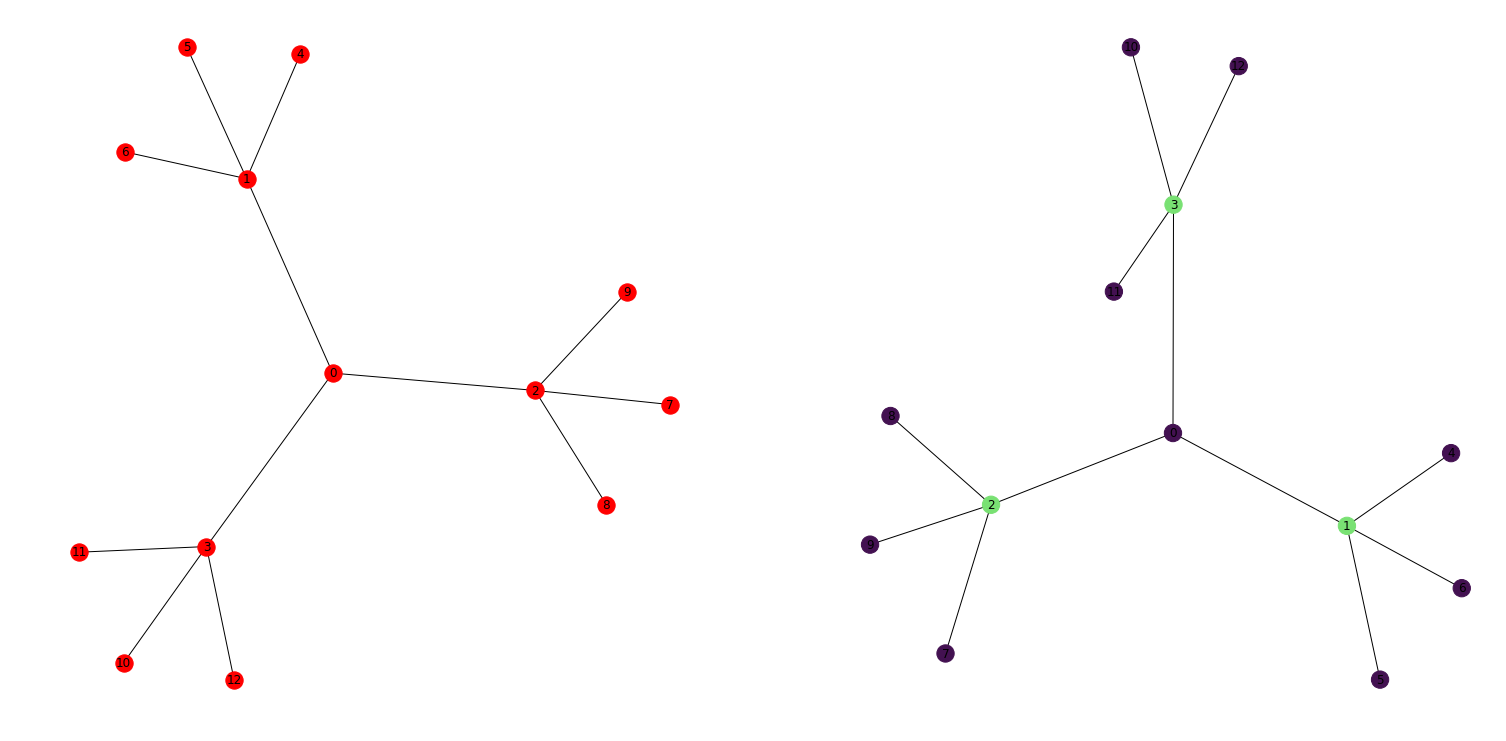

Time taken by different Algorithms:

Basic Greedy Algorithm:
11.9 µs ± 749 ns per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Graph Coloring By Ordering Nodes (By Largest Degree First):
41.8 µs ± 1.34 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Algorithm With Random Shuffling:
20.4 µs ± 993 ns per loop (mean ± std. dev. of 2 runs, 10 loops each)

Welsh Powell:
16.5 µs ± 1.08 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Algorithm using DFS 
238 µs ± 3.07 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Algorithm using BFS 
206 µs ± 2.99 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [12]:
G = nx.balanced_tree(3,2)
printGraphAndAnalyse(G, 13)

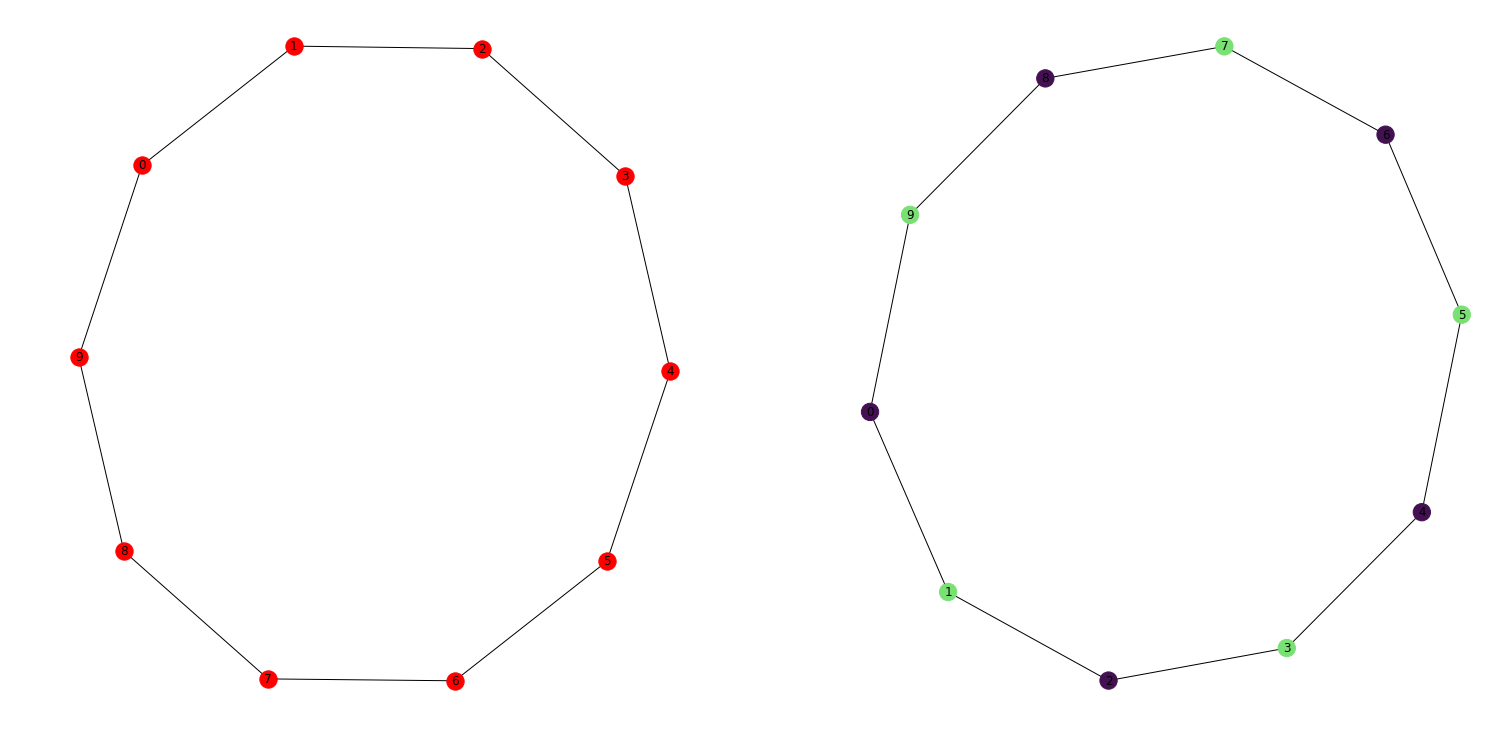

Time taken by different Algorithms:

Basic Greedy Algorithm:
10.4 µs ± 737 ns per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Graph Coloring By Ordering Nodes (By Largest Degree First):
35.4 µs ± 1.32 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Algorithm With Random Shuffling:
18 µs ± 1.07 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)

Welsh Powell:
14.7 µs ± 1.08 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Algorithm using DFS 
214 µs ± 2.74 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Algorithm using BFS 
192 µs ± 4.24 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [13]:
G = nx.cycle_graph(10)
printGraphAndAnalyse(G, 13)

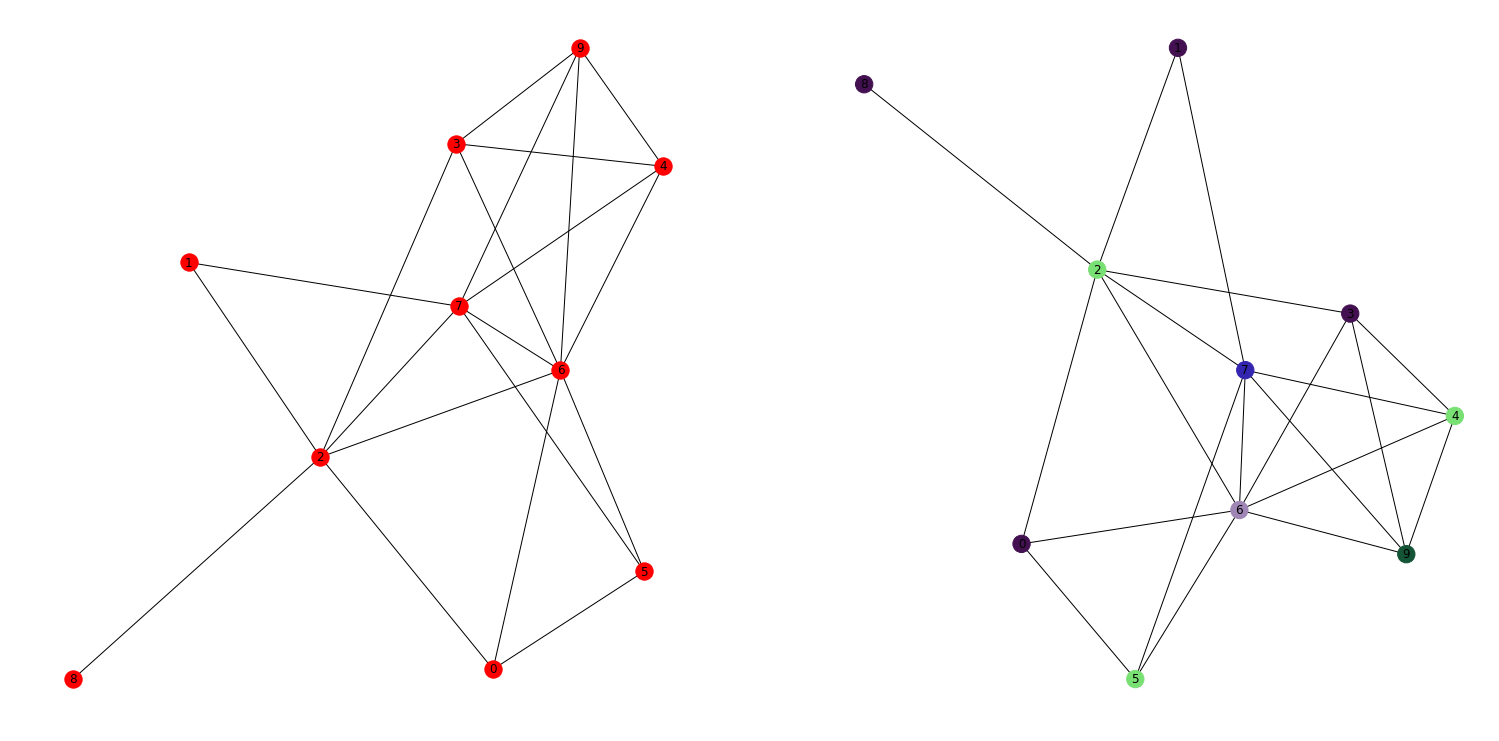

Time taken by different Algorithms:

Basic Greedy Algorithm:
11.4 µs ± 734 ns per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Graph Coloring By Ordering Nodes (By Largest Degree First):
35 µs ± 1.29 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Algorithm With Random Shuffling:
20.1 µs ± 796 ns per loop (mean ± std. dev. of 2 runs, 10 loops each)

Welsh Powell:
14.4 µs ± 1 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Algorithm using DFS 
255 µs ± 2.49 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Algorithm using BFS 
226 µs ± 6.55 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [14]:
G = nx.fast_gnp_random_graph(10,0.5)
printGraphAndAnalyse(G, 13)

In [15]:
G = nx.fast_gnp_random_graph(500,0.5)
analyse(G)

Basic Greedy Algorithm
11.6 ms ± 232 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Graph Coloring By Ordering Nodes (By Largest Degree First)
13 ms ± 209 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Algorithm With Random Shuffling
11 ms ± 7.36 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)

Welsh Powell
3.65 ms ± 76.9 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Algorithm using DFS 
362 ms ± 300 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)

Greedy Algorithm using BFS 
356 ms ± 4.4 ms per loop (mean ± std. dev. of 2 runs, 10 loops each)
